## Caption Detector Usage

In [1]:
import pandas as pd
from util import *
from caption_extraction import *

In [2]:
# pdfplumber로 추출한 image, table, text 정보
samsung_image = pd.read_pickle('data/[삼성전자]사업보고서(2022.03.08)_image.pickle')
samsung_table = pd.read_pickle('data/[삼성전자]사업보고서(2022.03.08)_table.pickle')
samsung_text = pd.read_pickle('data/[삼성전자]사업보고서(2022.03.08)_text.pickle')

# 공시문서 pdf 원본의 경로
path = 'data/[삼성전자]사업보고서(2022.03.08).pdf'
pages = get_pages(get_pdf(path))

In [3]:
caption_detector(pages, samsung_image, samsung_table, samsung_text, corp='[삼성전자]사업보고서(2022.03.08)_test')

  0%|          | 0/569 [00:00<?, ?it/s]

## Visualization for Check

In [6]:
for idx, text in enumerate(samsung_text[19]):
    if '단위' in text['text']: # ※☞
        print(idx)

53


table: (50.0, 267.0, 545.0, 483.0)
text: (490.76, 247.9910000000001, 516.885, 258.9910000000001)
text: (520.548, 247.9910000000001, 524.211, 258.9910000000001)
distance: 3.66
False


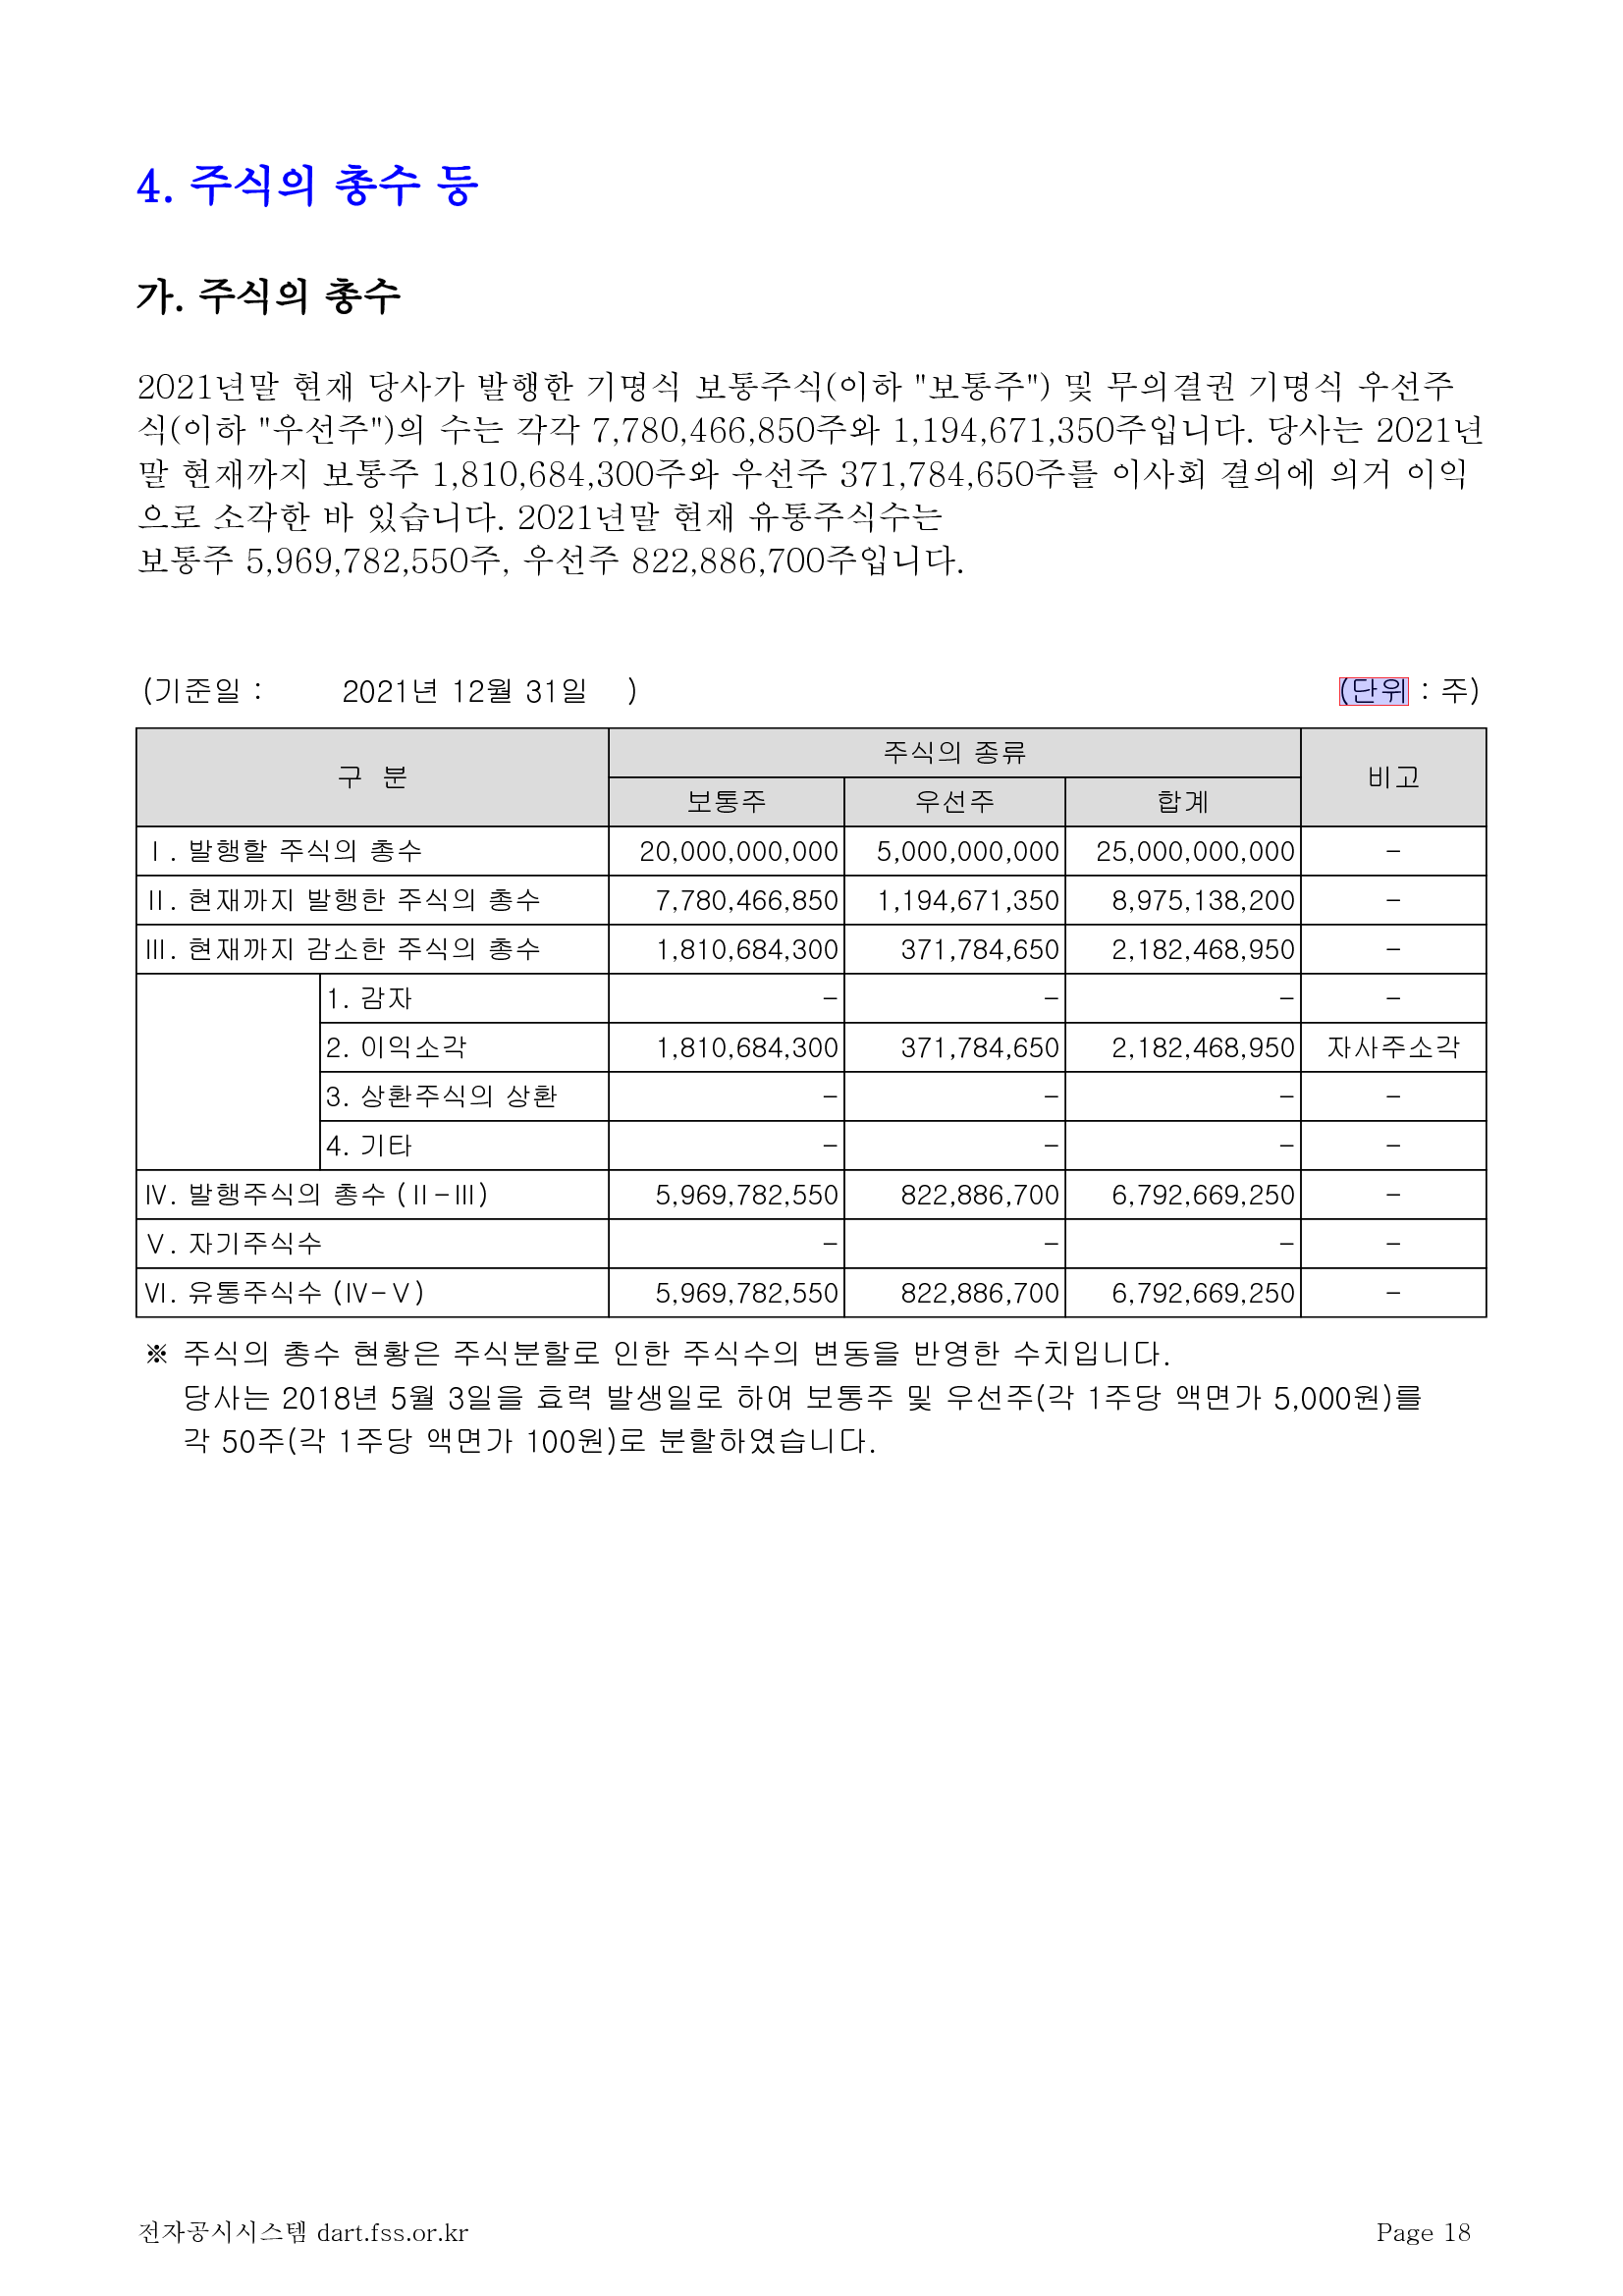

In [10]:
p = 19
i = 0 # table
j = 53 # text
k = 54 # text (sub)

table_list = [table['bbox'] for table in samsung_table[p]]
# text_list = [(round(text['x0'], 2), round(text['top'], 2), round(text['x1'], 2), round(text['bottom'], 2)) for text in samsung_text[p]]
text_list = [(text['x0'], text['top'], text['x1'], text['bottom']) for text in samsung_text[p]]

print('table:', table_list[i])
print('text:', text_list[j])
print('text:', text_list[k])
# print('distance:', round(rect_distance(table_list[i], text_list[j]), 2))
print('distance:', round(rect_distance(text_list[j], text_list[k]), 2))
# print('difference of height:', diff_height(text_list[j], text_list[k]))
# print(round(text_list[j][1], 2) == round(text_list[k][1], 2))
# print(round(text_list[j][3], 2) == round(text_list[k][3], 2))
print(contains(table_list[i], text_list[j]))

im = pages[p].to_image(resolution=200)
im.reset()
# im.draw_rect(table_list[i])
im.draw_rect(text_list[j])
# im.draw_rect(text_list[k])